<a href="https://colab.research.google.com/github/naralakamsani/reinforcment_learning/blob/main/frozen_lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [2]:
%pip -q install gymnasium
%pip -q install bettermdptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [3]:
import math

import gymnasium as gym
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv
from examples.plots import Plots

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import time

from tqdm import tqdm

from gymnasium.envs.toy_text.frozen_lake import generate_random_map

from gymnasium.wrappers import TransformReward

# Plots

In [4]:
def visualize_policy(policy, values, env, title, cbar_label = "State Value"):
    policy = list(map(lambda x: policy(x), range(env.observation_space.n)))

    lake_grid = np.asarray(env.unwrapped.desc).reshape(env.unwrapped.nrow, env.unwrapped.ncol)
    policy_arrows = {0: "←", 1: "↓", 2: "→", 3: "↑"}

    state_values_grid = values.reshape(env.unwrapped.nrow, env.unwrapped.ncol)

    fig, ax = plt.subplots()
    cax = ax.matshow(state_values_grid, cmap='viridis')

    ax.set_title(title)

    plt.colorbar(cax).set_label(cbar_label)

    for i in range(env.unwrapped.nrow):
        for j in range(env.unwrapped.ncol):
            state = i * env.unwrapped.ncol + j

            if lake_grid[i, j] == b'H':
                ax.text(j, i, "X", ha='center', va='center', color='Red')
            elif lake_grid[i, j] == b'G':
                ax.text(j, i, "O", ha='center', va='center', color='Green')
            else:
                action = policy[state]
                ax.text(j, i, policy_arrows[action], ha='center', va='center', color='Black')

    plt.grid(False)

    plt.show()

In [5]:
def plot_v_iters(all_tracked_values, param_values, param_name, title, y_label='State Value'):
  for tracked_values, param in zip(all_tracked_values,param_values):
    max_value_per_iter = np.amax(tracked_values, axis=1)
    plt.plot(max_value_per_iter, label=f'{param_name} = {param}')

  plt.title(f'{title}: Max {y_label}')
  plt.xlabel('Iteration')
  plt.ylabel(f'Max {y_label}')
  plt.legend()
  plt.grid(True)
  plt.show()

  for tracked_values, param in zip(all_tracked_values,param_values):
    mean_value_per_iter = np.mean(tracked_values, axis=1)
    plt.plot(mean_value_per_iter, label=f'{param_name} = {param}')

  plt.title(f'{title}: Mean {y_label}')
  plt.xlabel('Iteration')
  plt.ylabel(f'Mean {y_label}')
  plt.legend()
  plt.grid(True)
  plt.show()

In [6]:
def plot_training_times(training_times, params, param_name, title):
    plt.figure()

    params = [str(param) for param in params]

    plt.bar(params, training_times)

    plt.ylabel('Runtime (seconds)')
    plt.xlabel(param_name)
    plt.title(title)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


# Value Iteration

## Policy

runtime = 0.05 seconds


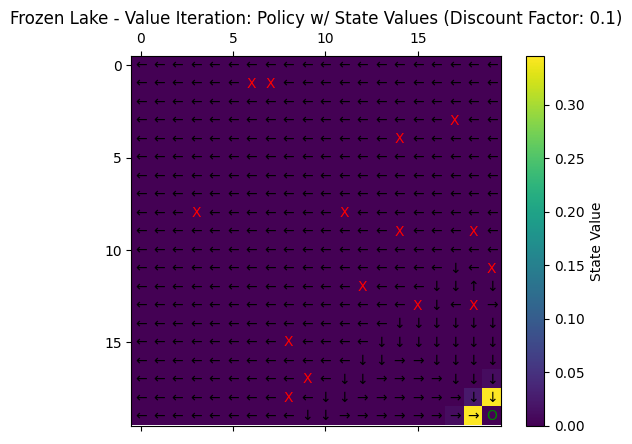

runtime = 0.16 seconds


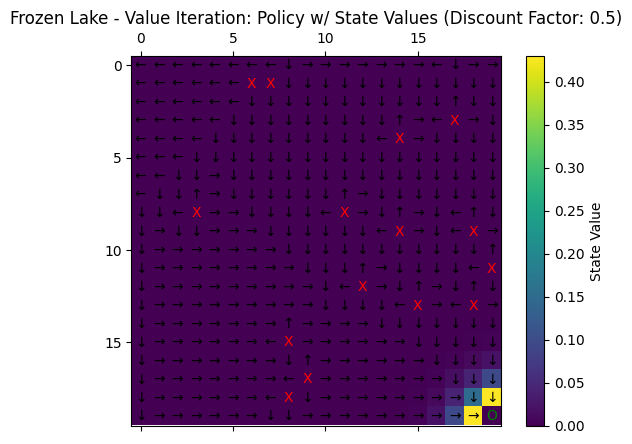

runtime = 0.88 seconds


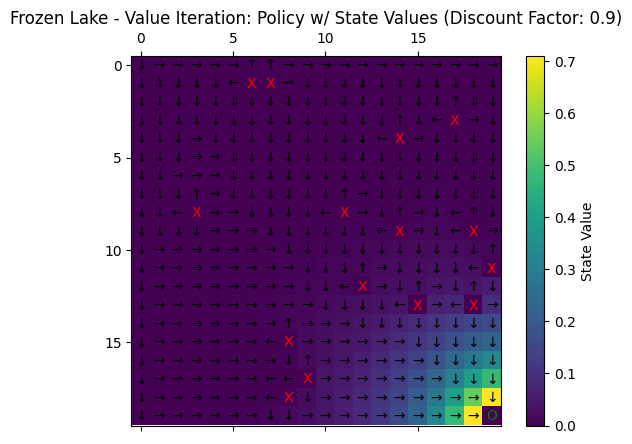

runtime = 2.29 seconds


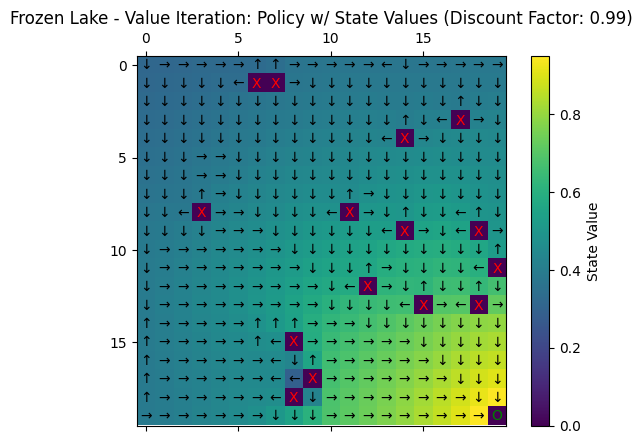

In [ ]:
frozen_lake = gym.make(
    "FrozenLake-v1",
    is_slippery=True,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=20, p=0.975, seed=0
    ),
)

# for s in range(len(frozen_lake.unwrapped.P)):
#     for a in range(len(frozen_lake.unwrapped.P[s])):
#         for i, (prob, next_state, reward, done) in enumerate(frozen_lake.unwrapped.P[s][a]):
#           if reward == 0:
#             frozen_lake.unwrapped.P[s][a][i] = (prob, next_state, 0.005, done)

vi_gammas = [0.1,0.5,0.9,0.99]

vi_gammas_tracked_values = []

vi_gammas_runtimes = []

for gamma in vi_gammas:

  start = time.time()

  V, V_track, pi = Planner(frozen_lake.unwrapped.P).value_iteration(gamma=gamma, n_iters=600, theta=1e-10)

  end = time.time()
  running_time = end - start

  vi_gammas_runtimes.append(running_time)

  vi_gammas_tracked_values.append(V_track)

  visualize_policy(pi, V, frozen_lake, "Frozen Lake - Value Iteration: Policy w/ State Values (Discount Factor: {})".format(gamma))

runtime = 0.44 seconds


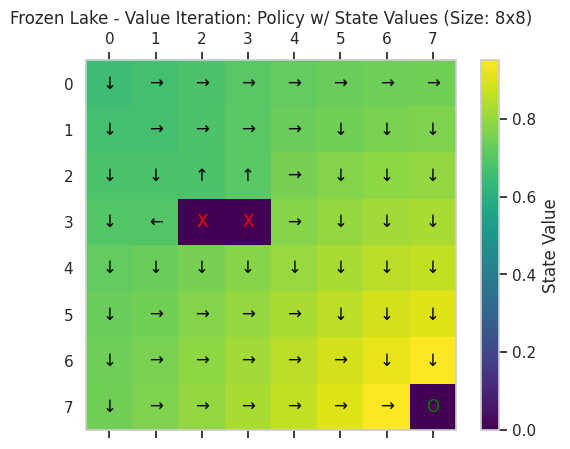

runtime = 3.26 seconds


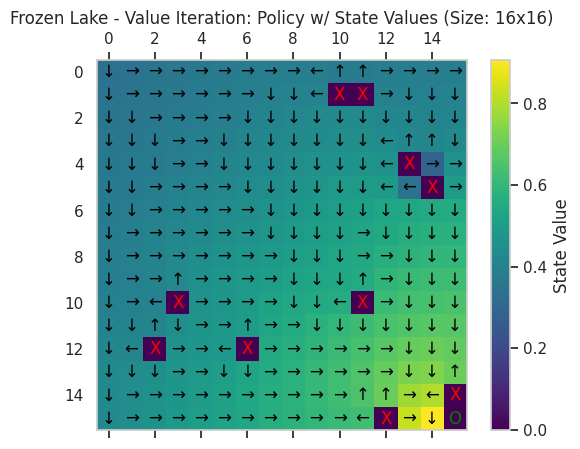

runtime = 2.35 seconds


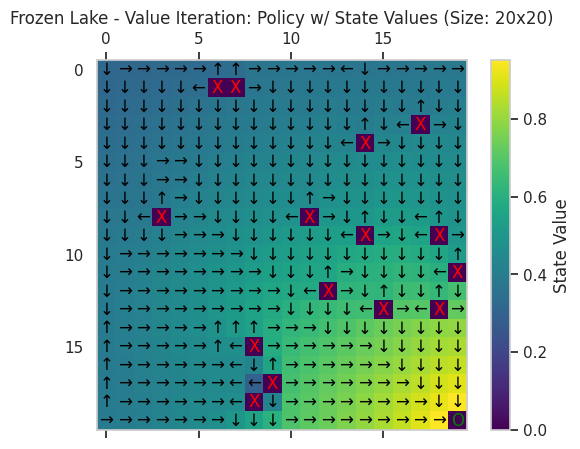

In [ ]:
vi_sizes = [8,16,20]

vi_sizes_tracked_values = []

vi_sizes_runtimes = []

for size in vi_sizes:

  frozen_lake = gym.make(
    "FrozenLake-v1",
    is_slippery=True,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=size, p=0.975, seed=0
    ),
  )

  # for s in range(len(frozen_lake.unwrapped.P)):
  #   for a in range(len(frozen_lake.unwrapped.P[s])):
  #       for i, (prob, next_state, reward, done) in enumerate(frozen_lake.unwrapped.P[s][a]):
  #         if reward == 0:
  #           frozen_lake.unwrapped.P[s][a][i] = (prob, next_state, 0.005, done)

  start = time.time()

  V, V_track, pi = Planner(frozen_lake.unwrapped.P).value_iteration(gamma=0.99, n_iters=600, theta=1e-10)

  end = time.time()
  running_time = end - start

  vi_sizes_runtimes.append(running_time)

  vi_sizes_tracked_values.append(V_track)

  visualize_policy(pi, V, frozen_lake, f'Frozen Lake - Value Iteration: Policy w/ State Values (Size: {size}x{size})')

## Convergence

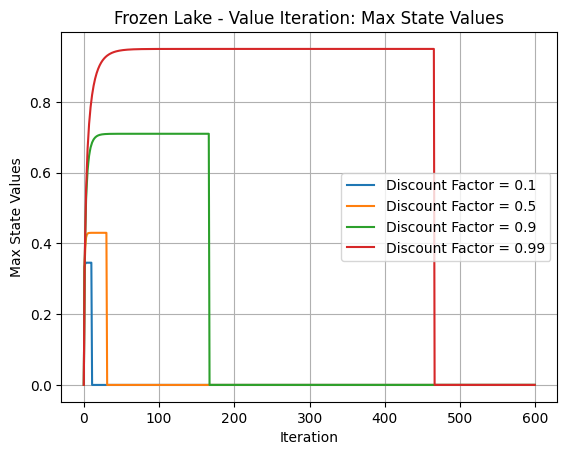

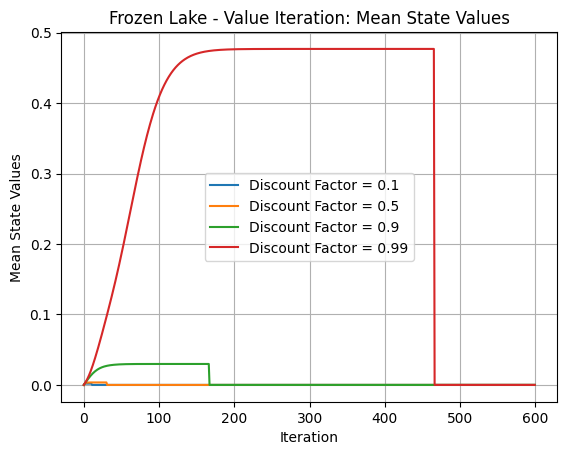

In [ ]:
plot_v_iters(vi_gammas_tracked_values, vi_gammas, "Discount Factor", "Frozen Lake - Value Iteration", y_label='State Values')

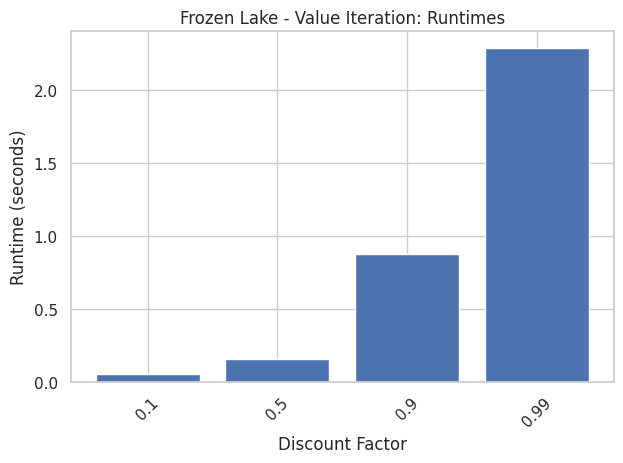

In [ ]:
plot_training_times(vi_gammas_runtimes, vi_gammas, "Discount Factor", "Frozen Lake - Value Iteration: Runtimes")

## States

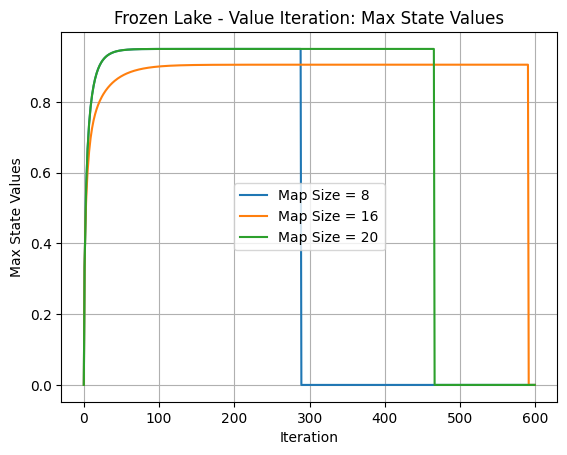

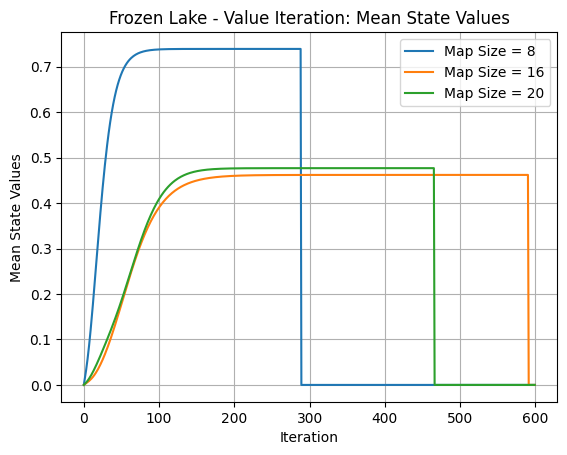

In [ ]:
plot_v_iters(vi_sizes_tracked_values, vi_sizes, "Map Size", "Frozen Lake - Value Iteration", y_label='State Values')

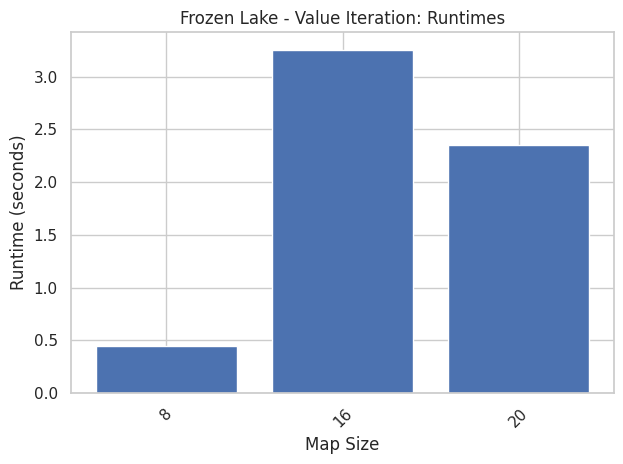

In [ ]:
plot_training_times(vi_sizes_runtimes, vi_sizes, "Map Size", "Frozen Lake - Value Iteration: Runtimes")

# Policy Iteration

## Policy

runtime = 2.16 seconds


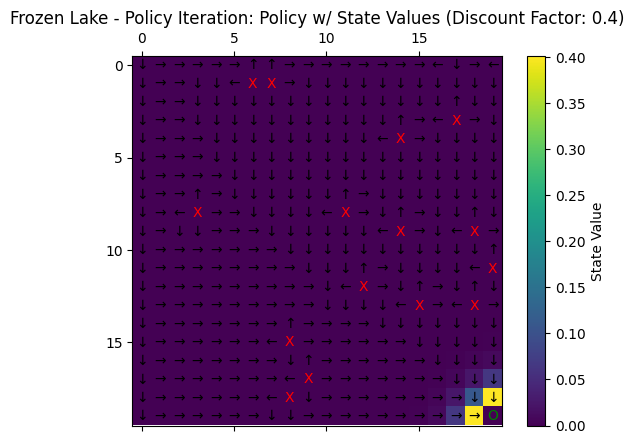

runtime = 5.41 seconds


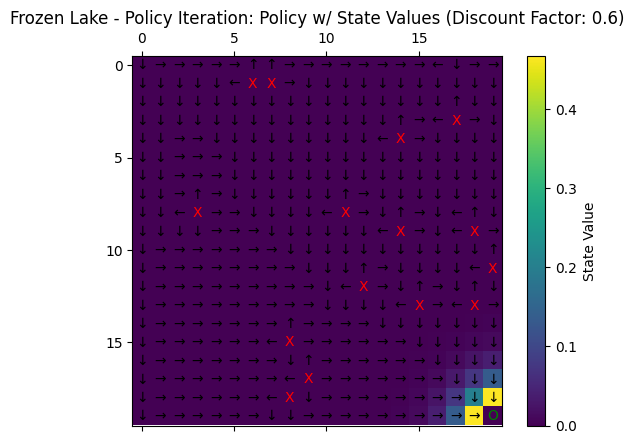

runtime = 18.15 seconds


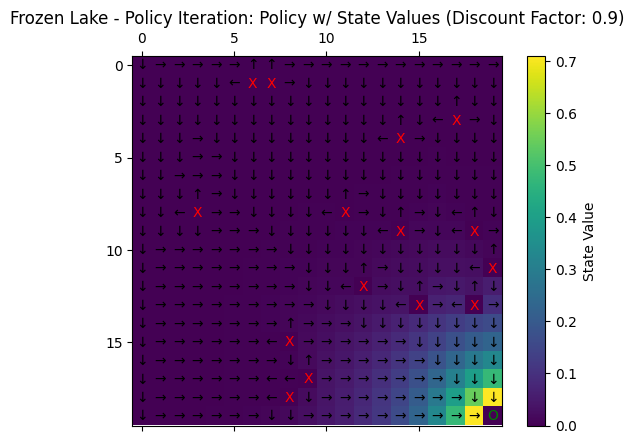

runtime = 33.06 seconds


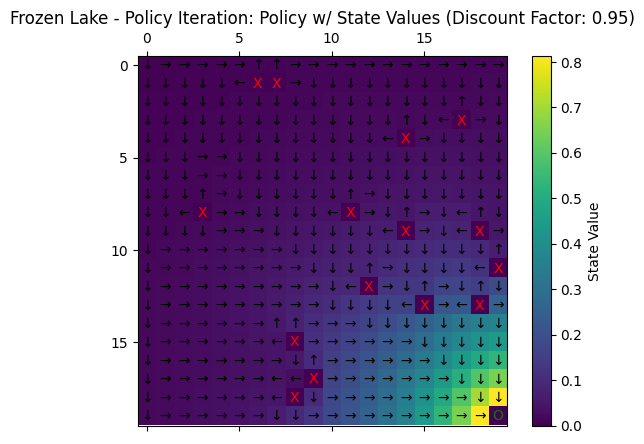

runtime = 75.33 seconds


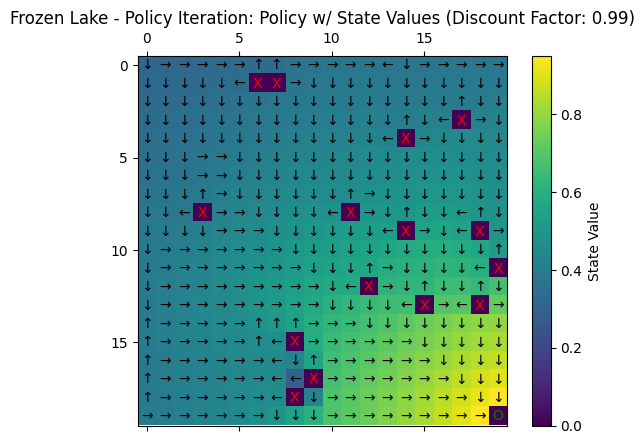

In [ ]:
frozen_lake = gym.make(
    "FrozenLake-v1",
    is_slippery=True,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=20, p=0.975, seed=0
    ),
)

pi_gammas = [0.4,0.6,0.9,0.95,0.99]

pi_gammas_tracked_values = []

pi_gammas_runtimes = []

for gamma in pi_gammas:

  start = time.time()

  V, V_track, pi = Planner(frozen_lake.unwrapped.P).policy_iteration(gamma=gamma, n_iters=20, theta=1e-10)

  end = time.time()
  running_time = end - start

  pi_gammas_runtimes.append(running_time)

  pi_gammas_tracked_values.append(V_track)

  visualize_policy(pi, V, frozen_lake, "Frozen Lake - Policy Iteration: Policy w/ State Values (Discount Factor: {})".format(gamma))

runtime = 1.08 seconds


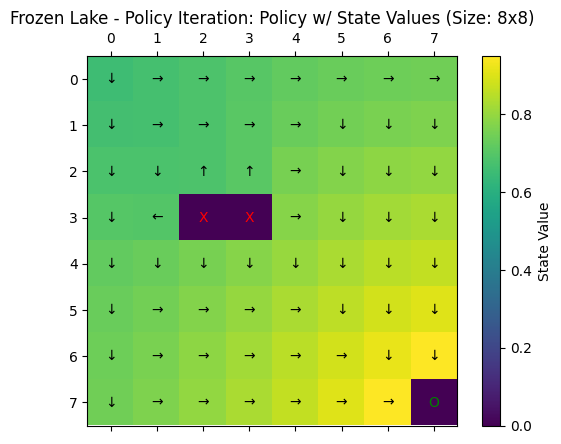

runtime = 38.15 seconds


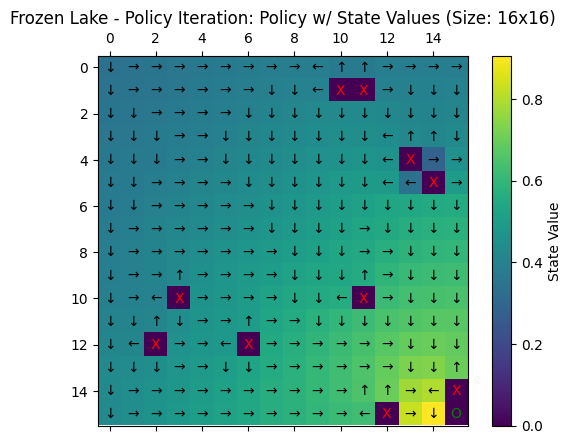

runtime = 91.80 seconds


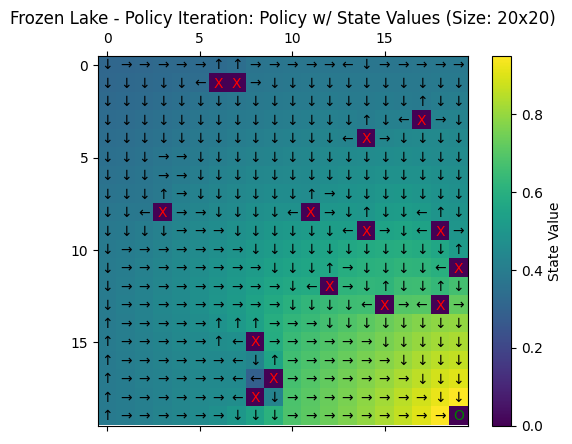

In [ ]:
pi_sizes = [8,16,20]

pi_sizes_tracked_values = []

pi_sizes_runtimes = []

for size in pi_sizes:

  frozen_lake = gym.make(
    "FrozenLake-v1",
    is_slippery=True,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=size, p=0.975, seed=0
    ),
  )

  start = time.time()

  V, V_track, pi = Planner(frozen_lake.unwrapped.P).policy_iteration(gamma=0.99, n_iters=20, theta=1e-10)

  end = time.time()
  running_time = end - start

  pi_sizes_runtimes.append(running_time)

  pi_sizes_tracked_values.append(V_track)

  visualize_policy(pi, V, frozen_lake, f'Frozen Lake - Policy Iteration: Policy w/ State Values (Size: {size}x{size})')

## Convergence

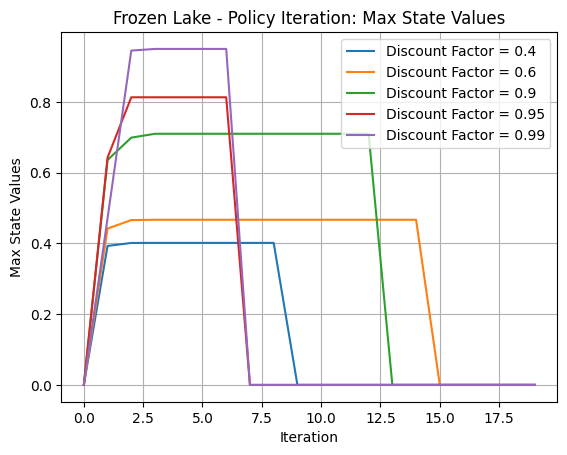

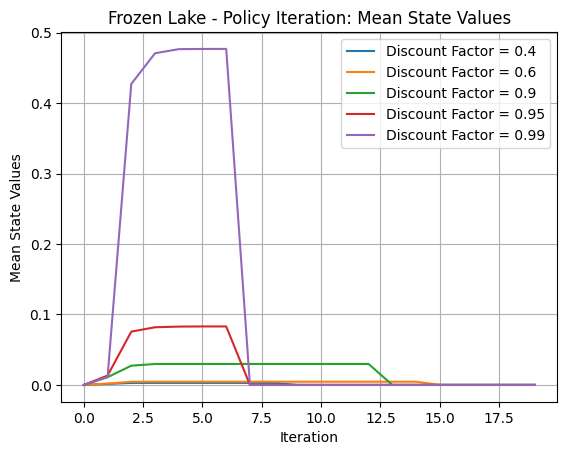

In [ ]:
plot_v_iters(pi_gammas_tracked_values, pi_gammas, "Discount Factor", "Frozen Lake - Policy Iteration", y_label='State Values')

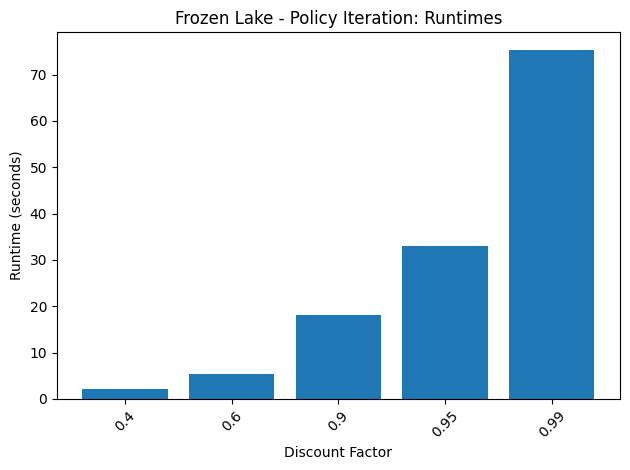

In [ ]:
plot_training_times(pi_gammas_runtimes, pi_gammas, "Discount Factor", "Frozen Lake - Policy Iteration: Runtimes")

## States

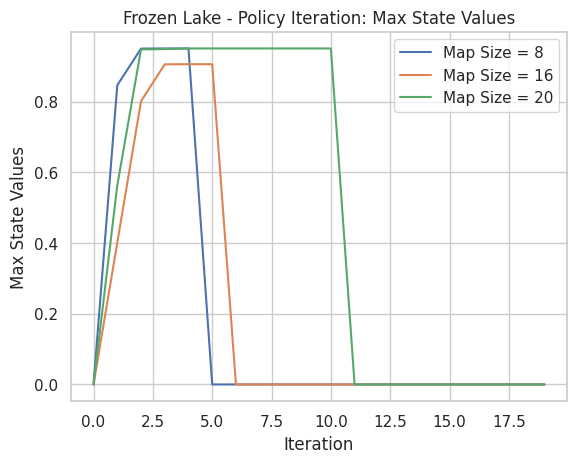

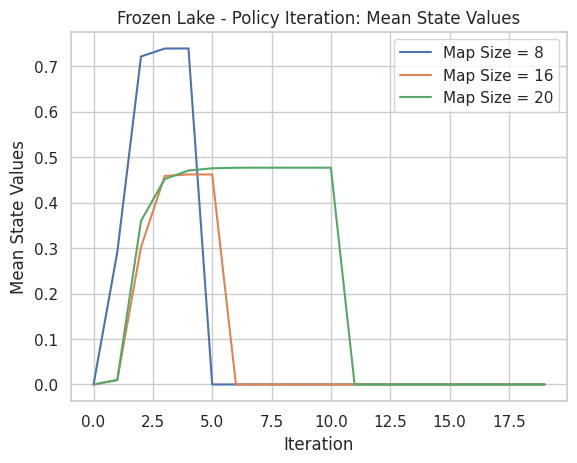

In [ ]:
plot_v_iters(pi_sizes_tracked_values, pi_sizes, "Map Size", "Frozen Lake - Policy Iteration", y_label='State Values')

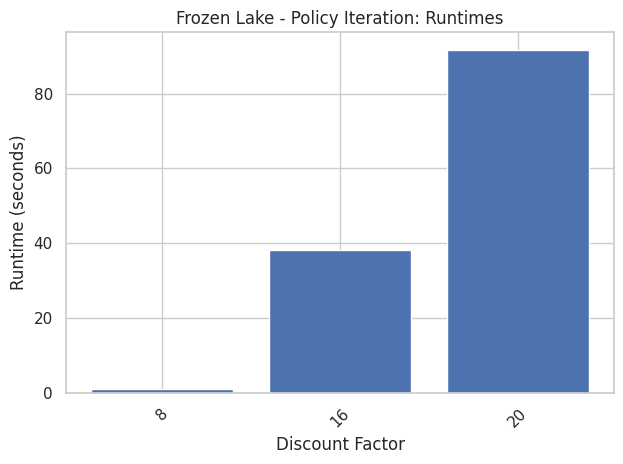

In [ ]:
plot_training_times(pi_sizes_runtimes, pi_sizes, "Size", "Frozen Lake - Policy Iteration: Runtimes")

# Q-Learning

## Policy

runtime = 98.39 seconds


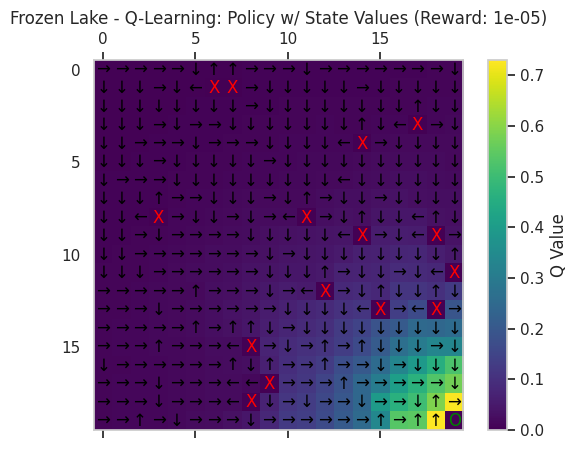

runtime = 110.77 seconds


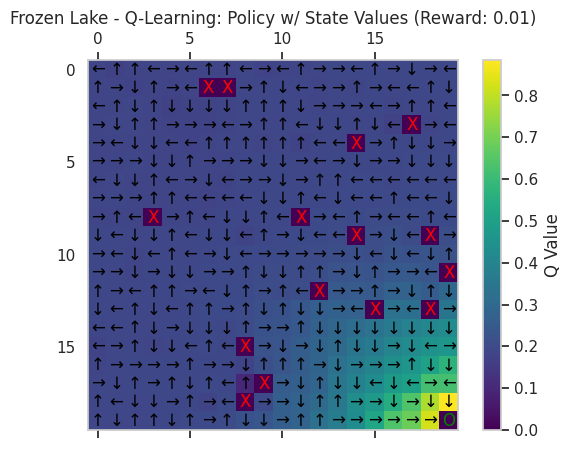

runtime = 99.40 seconds


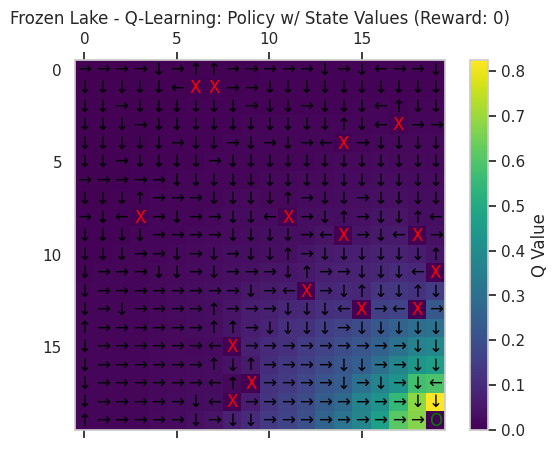

runtime = 46.06 seconds


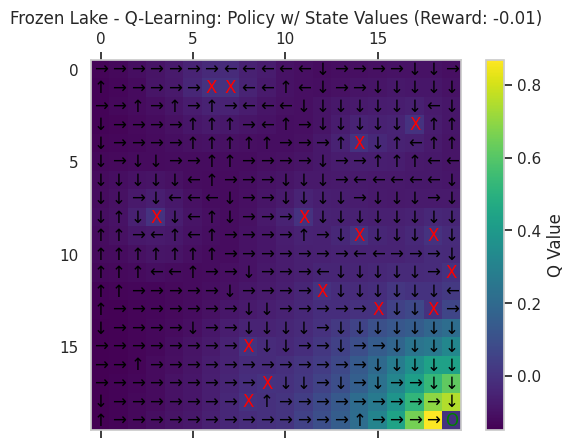

runtime = 99.50 seconds


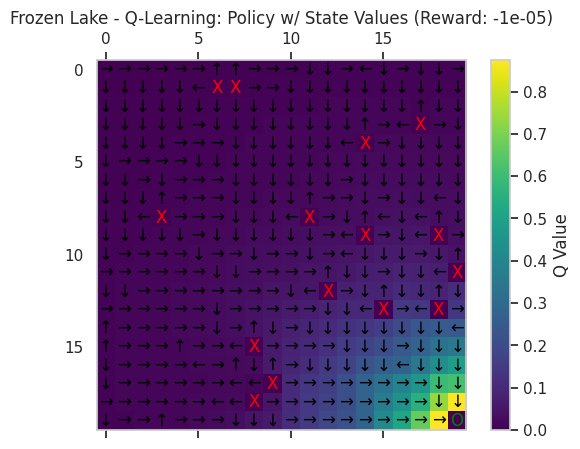

In [20]:
q_rewards = [0.00001,0.01,0,-0.01,-0.00001]

q_rewards_tracked_values = []

q_rewards_runtimes = []

for reward in q_rewards:

  frozen_lake = gym.make(
    "FrozenLake-v1",
    is_slippery=True,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=20, p=0.975, seed=0
    ),
  )

  frozen_lake.unwrapped.initial_state_distrib = np.array(np.logical_or(frozen_lake.desc==b"F", frozen_lake.desc==b"S")).astype("float64").ravel()
  frozen_lake.unwrapped.initial_state_distrib /= frozen_lake.unwrapped.initial_state_distrib.sum()

  frozen_lake = TransformReward(frozen_lake, lambda r: reward if r==0 else r)

  start = time.time()

  Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=0.95,
                                                          init_alpha=0.8,
                                                          min_alpha=0.1,
                                                          alpha_decay_ratio=1,
                                                          init_epsilon=0.99,
                                                          min_epsilon=0.1,
                                                          epsilon_decay_ratio=0.99,
                                                          n_episodes=50000)
  end = time.time()
  running_time = end - start

  q_rewards_runtimes.append(running_time)

  q_rewards_tracked_values.append(np.amax(Q_track, axis=2))

  visualize_policy(pi, V, frozen_lake, "Frozen Lake - Q-Learning: Policy w/ State Values (Reward: {})".format(reward), cbar_label = "Q Value")

runtime = 87.48 seconds


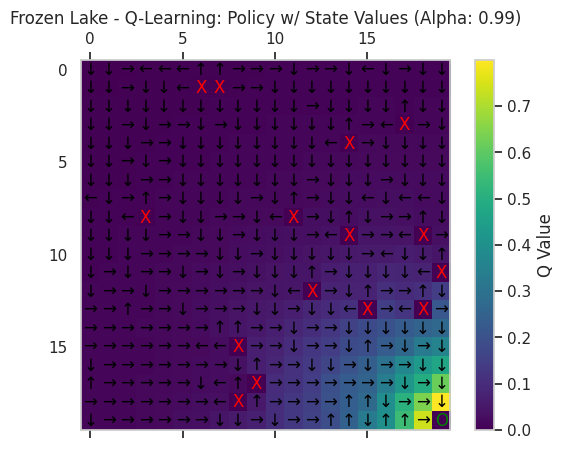

runtime = 89.69 seconds


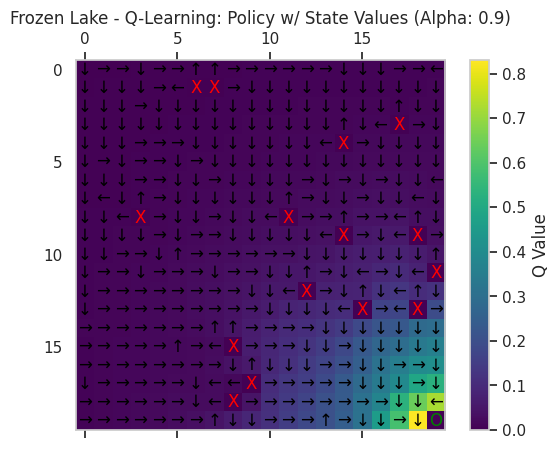

runtime = 91.57 seconds


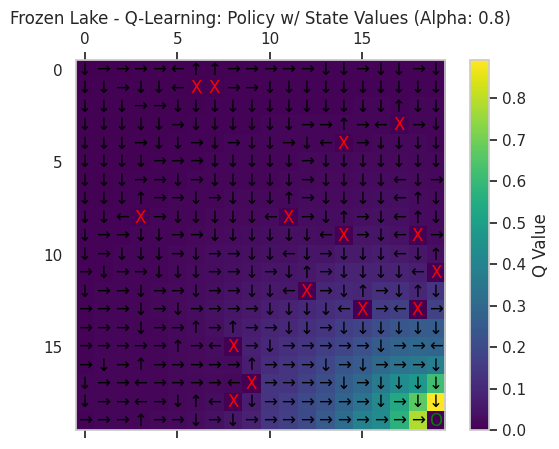

runtime = 90.85 seconds


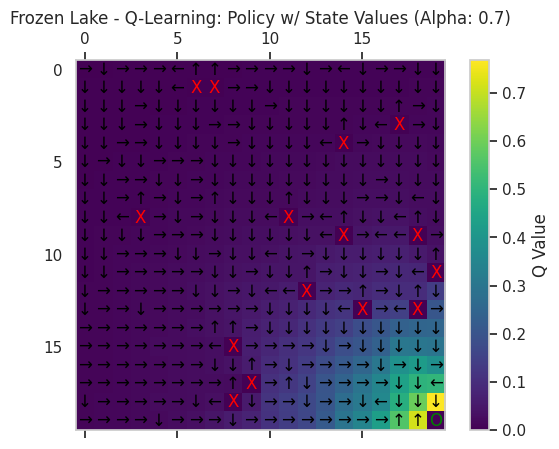

runtime = 92.25 seconds


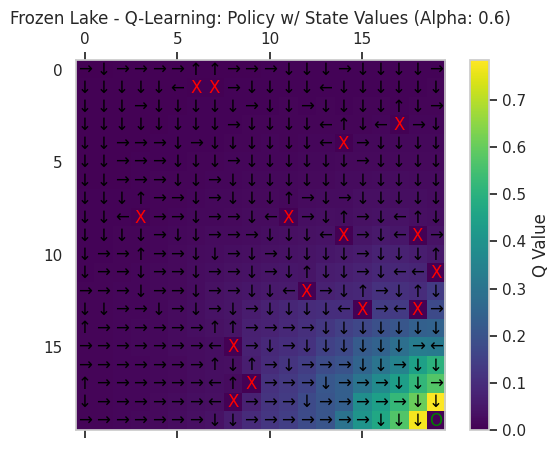

runtime = 93.44 seconds


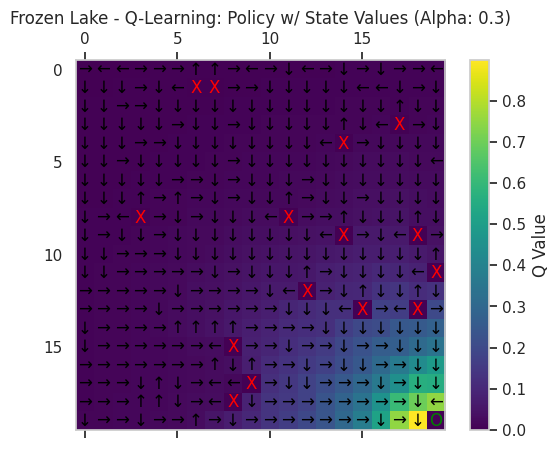

runtime = 91.86 seconds


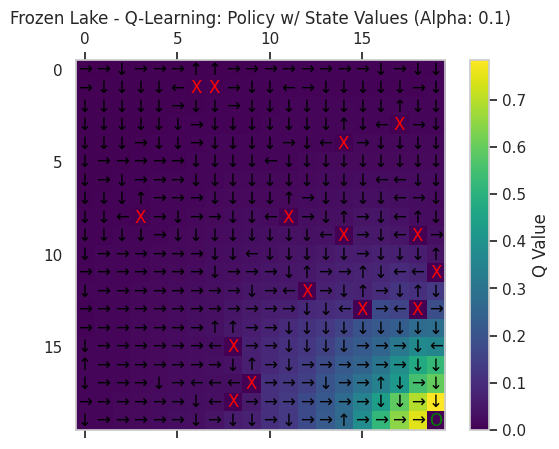

In [ ]:
frozen_lake = gym.make(
  "FrozenLake-v1",
  is_slippery=True,
  render_mode="rgb_array",
  desc=generate_random_map(
      size=20, p=0.975, seed=0
  ),
)

frozen_lake.unwrapped.initial_state_distrib = np.array(np.logical_or(frozen_lake.desc==b"F", frozen_lake.desc==b"S")).astype("float64").ravel()
frozen_lake.unwrapped.initial_state_distrib /= frozen_lake.unwrapped.initial_state_distrib.sum()


q_alphas = [0.99,0.9,0.8,0.3,0.1]

q_alphas_tracked_values = []

q_alphas_runtimes = []

for alpha in q_alphas:

  start = time.time()

  Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=0.95,
                                                          init_alpha=alpha,
                                                          min_alpha=0.1,
                                                          alpha_decay_ratio=1,
                                                          init_epsilon=0.99,
                                                          min_epsilon=0.1,
                                                          epsilon_decay_ratio=0.99,
                                                          n_episodes=50000)
  end = time.time()
  running_time = end - start

  q_alphas_runtimes.append(running_time)

  q_alphas_tracked_values.append(np.amax(Q_track, axis=2))

  visualize_policy(pi, V, frozen_lake, "Frozen Lake - Q-Learning: Policy w/ State Values (Alpha: {})".format(alpha), cbar_label = "Q Value")

runtime = 99.77 seconds


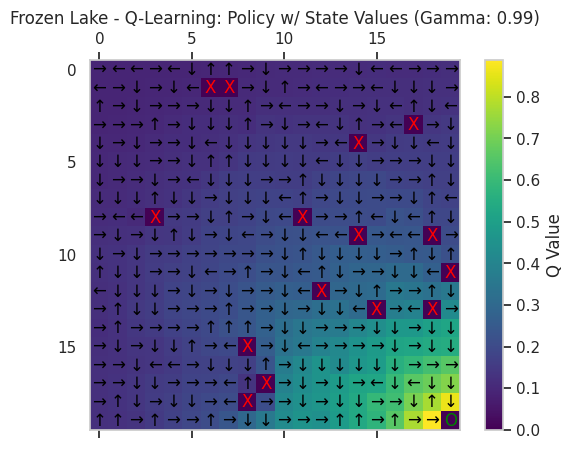

runtime = 84.85 seconds


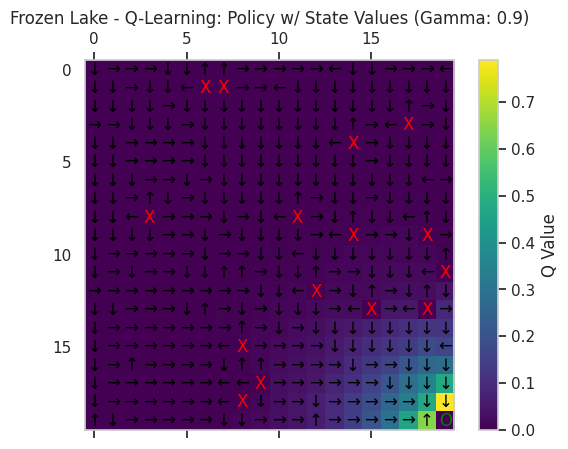

runtime = 79.26 seconds


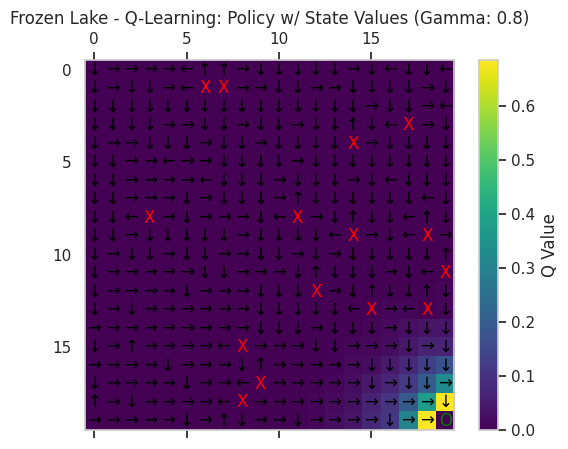

runtime = 67.38 seconds


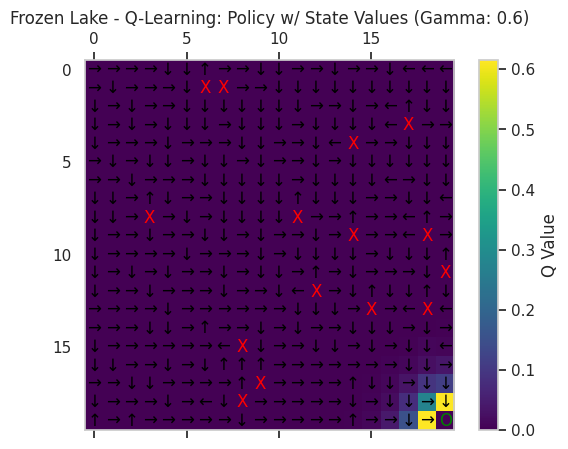

runtime = 61.53 seconds


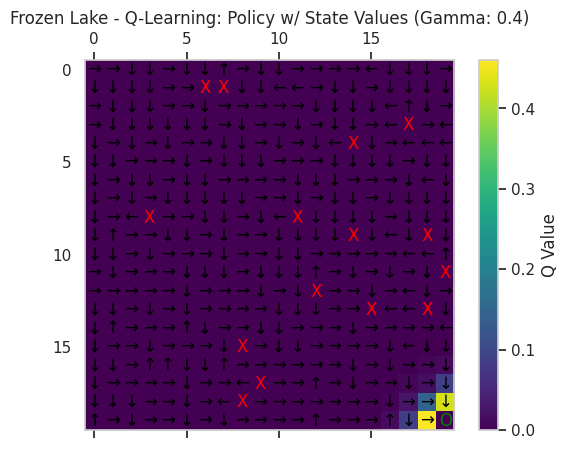

In [ ]:
frozen_lake = gym.make(
  "FrozenLake-v1",
  is_slippery=True,
  render_mode="rgb_array",
  desc=generate_random_map(
      size=20, p=0.975, seed=0
  ),
)

frozen_lake.unwrapped.initial_state_distrib = np.array(np.logical_or(frozen_lake.desc==b"F", frozen_lake.desc==b"S")).astype("float64").ravel()
frozen_lake.unwrapped.initial_state_distrib /= frozen_lake.unwrapped.initial_state_distrib.sum()

q_gammas = [0.99,0.9,0.8,0.6,0.4]

q_gammas_tracked_values = []

q_gammas_runtimes = []

for gamma in q_gammas:

  start = time.time()

  Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=gamma,
                                                          init_alpha=0.8,
                                                          min_alpha=0.1,
                                                          alpha_decay_ratio=0.99,
                                                          init_epsilon=0.99,
                                                          min_epsilon=0.1,
                                                          epsilon_decay_ratio=0.99,
                                                          n_episodes=50000)
  end = time.time()
  running_time = end - start

  q_gammas_runtimes.append(running_time)

  q_gammas_tracked_values.append(np.amax(Q_track, axis=2))

  visualize_policy(pi, V, frozen_lake, "Frozen Lake - Q-Learning: Policy w/ State Values (Gamma: {})".format(gamma), cbar_label = "Q Value")

runtime = 89.26 seconds


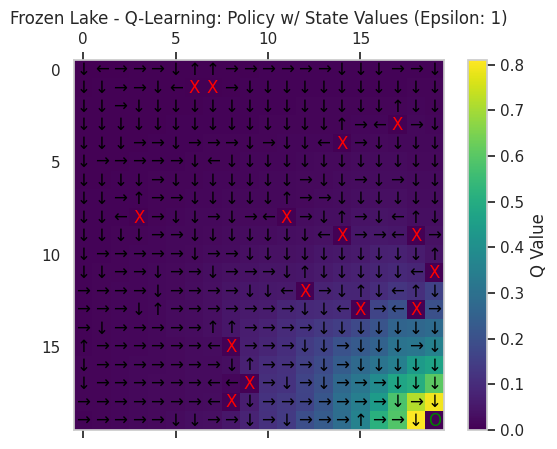

runtime = 88.15 seconds


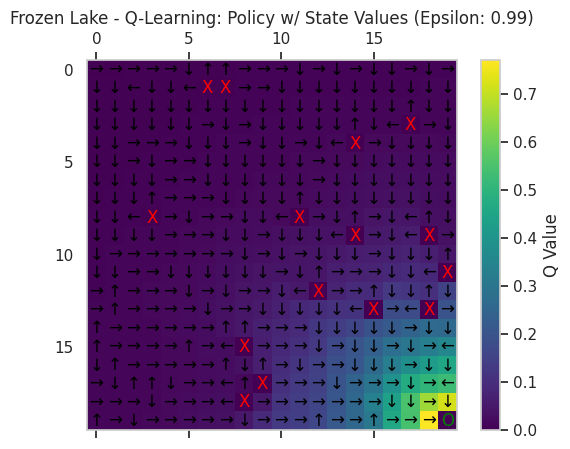

runtime = 89.28 seconds


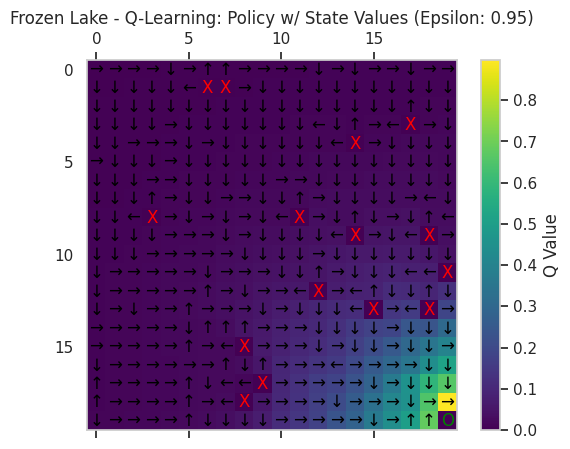

runtime = 90.32 seconds


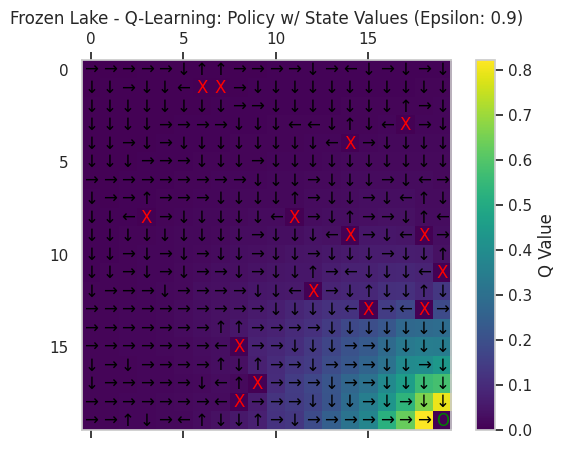

runtime = 92.68 seconds


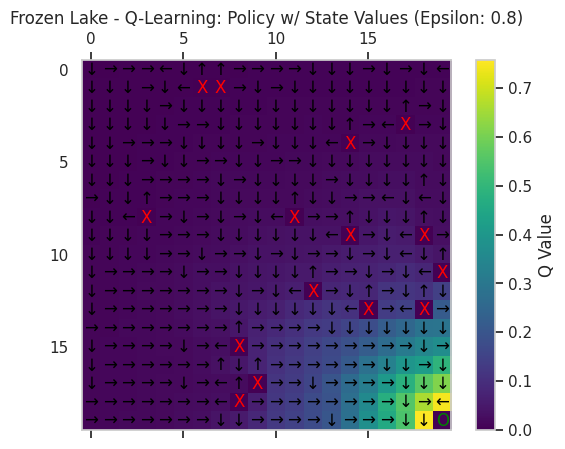

runtime = 94.20 seconds


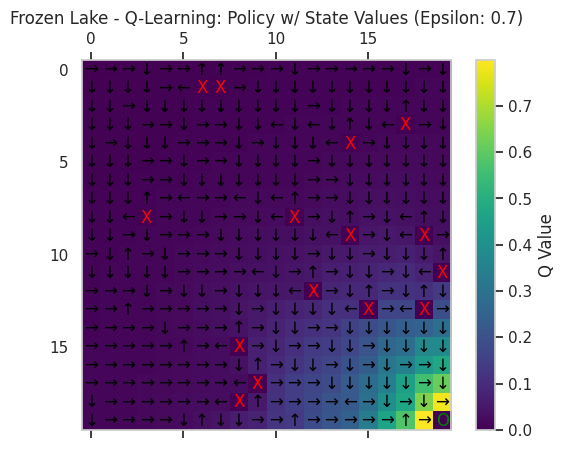

runtime = 95.17 seconds


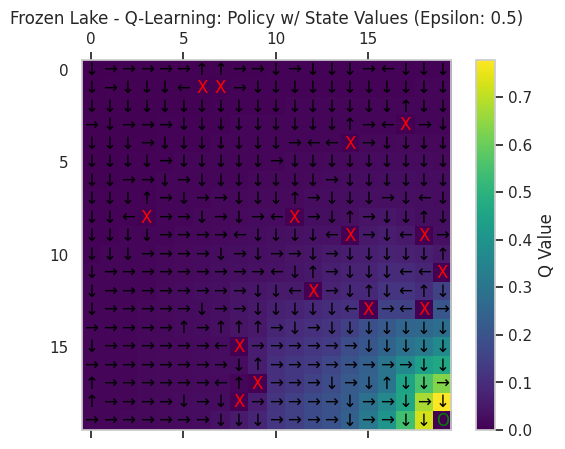

In [ ]:
frozen_lake = gym.make(
  "FrozenLake-v1",
  is_slippery=True,
  render_mode="rgb_array",
  desc=generate_random_map(
      size=20, p=0.975, seed=0
  ),
)

frozen_lake.unwrapped.initial_state_distrib = np.array(np.logical_or(frozen_lake.desc==b"F", frozen_lake.desc==b"S")).astype("float64").ravel()
frozen_lake.unwrapped.initial_state_distrib /= frozen_lake.unwrapped.initial_state_distrib.sum()


q_epsilons = [1,0.99,0.95,0.9,0.8,0.7,0.5]

q_epsilons_tracked_values = []

q_epsilons_runtimes = []

for epsilon in q_epsilons:

  start = time.time()

  Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=0.95,
                                                          init_alpha=0.99,
                                                          min_alpha=0.1,
                                                          alpha_decay_ratio=0.99,
                                                          init_epsilon=epsilon,
                                                          min_epsilon=0.1,
                                                          epsilon_decay_ratio=0.99,
                                                          n_episodes=50000)
  end = time.time()
  running_time = end - start

  q_epsilons_runtimes.append(running_time)

  q_epsilons_tracked_values.append(np.amax(Q_track, axis=2))

  visualize_policy(pi, V, frozen_lake, "Frozen Lake - Q-Learning: Policy w/ State Values (Epsilon: {})".format(epsilon), cbar_label = "Q Value")

runtime = 61.14 seconds


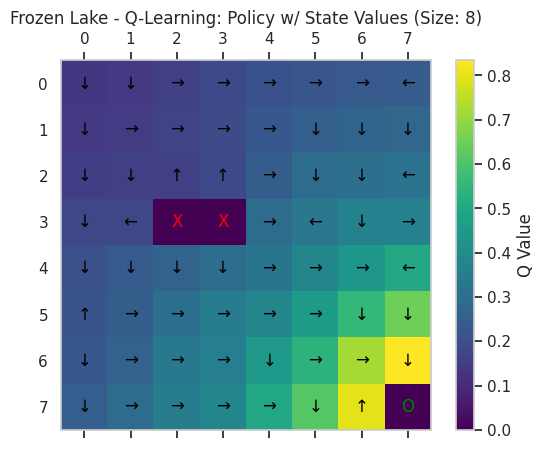

runtime = 96.00 seconds


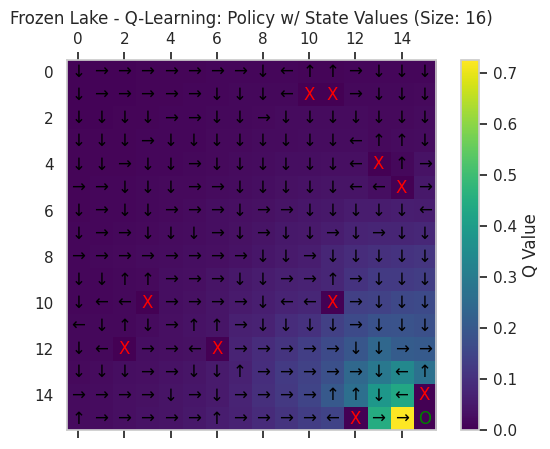

runtime = 95.89 seconds


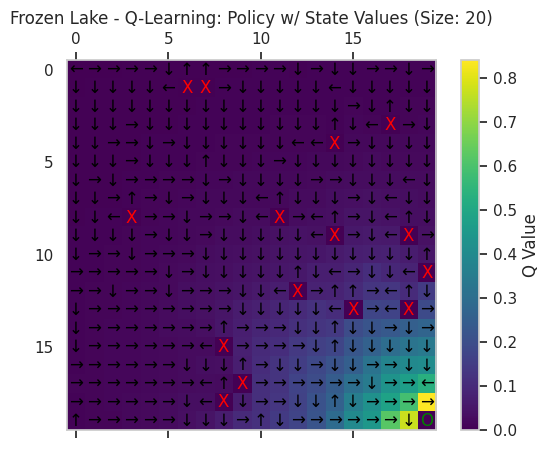

In [16]:
q_sizes = [8,16,20]

q_sizes_tracked_values = []

q_sizes_runtimes = []

for size in q_sizes:

  frozen_lake = gym.make(
  "FrozenLake-v1",
  is_slippery=True,
  render_mode="rgb_array",
  desc=generate_random_map(
      size=size, p=0.975, seed=0
    ),
  )

  frozen_lake.unwrapped.initial_state_distrib = np.array(np.logical_or(frozen_lake.desc==b"F", frozen_lake.desc==b"S")).astype("float64").ravel()
  frozen_lake.unwrapped.initial_state_distrib /= frozen_lake.unwrapped.initial_state_distrib.sum()

  start = time.time()

  Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=0.95,
                                                          init_alpha=0.8,
                                                          min_alpha=0.1,
                                                          alpha_decay_ratio=0.99,
                                                          init_epsilon=1,
                                                          min_epsilon=0.1,
                                                          epsilon_decay_ratio=0.99,
                                                          n_episodes=50000)
  end = time.time()
  running_time = end - start

  q_sizes_runtimes.append(running_time)

  q_sizes_tracked_values.append(np.amax(Q_track, axis=2))

  visualize_policy(pi, V, frozen_lake, "Frozen Lake - Q-Learning: Policy w/ State Values (Size: {})".format(size), cbar_label = "Q Value")

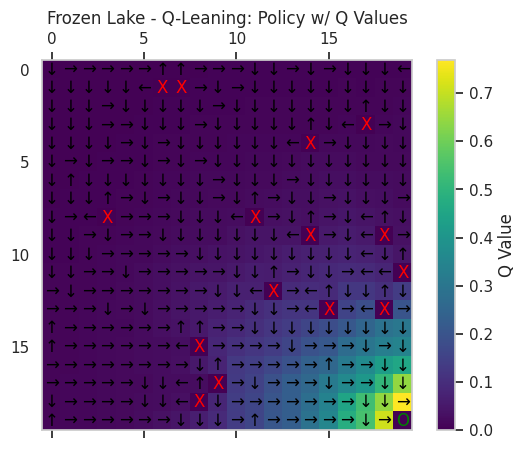

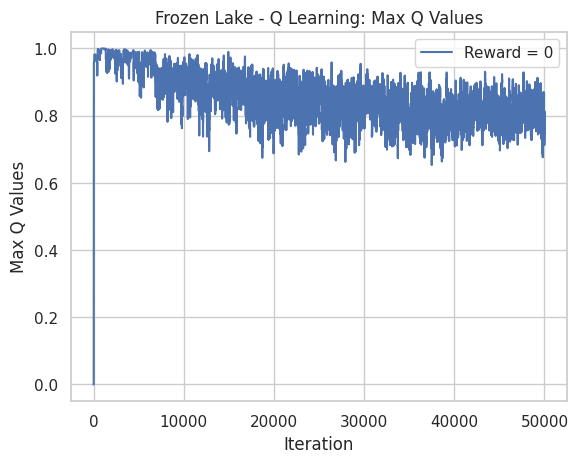

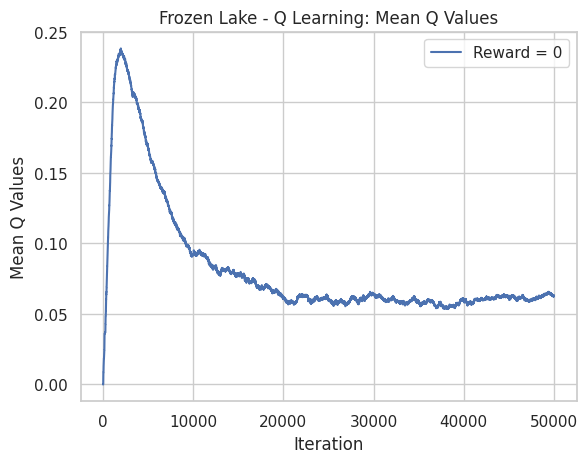

In [14]:
frozen_lake = gym.make(
    "FrozenLake-v1",
    is_slippery=True,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=20, p=0.975, seed=0
    ),
)

frozen_lake.unwrapped.initial_state_distrib = np.array(np.logical_or(frozen_lake.desc==b"F", frozen_lake.desc==b"S")).astype("float64").ravel()
frozen_lake.unwrapped.initial_state_distrib /= frozen_lake.unwrapped.initial_state_distrib.sum()

# frozen_lake = TransformReward(frozen_lake, lambda r: -0.00001 if r==0 else r)

gamma=0.95
init_alpha=0.8
min_alpha=0.1
alpha_decay_ratio=0.99
init_epsilon=1
min_epsilon=0.1
epsilon_decay_ratio=0.99
n_episodes=50000

print(f" gamma={gamma}\n init_alpha={init_alpha}\n min_alpha={min_alpha}\n alpha_decay_ratio={alpha_decay_ratio}\n init_epsilon={init_epsilon}\n min_epsilon={min_epsilon}\n epsilon_decay_ratio={epsilon_decay_ratio}\n n_episodes={n_episodes}\n")

Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=gamma,
                                                        init_alpha=init_alpha,
                                                        min_alpha=min_alpha,
                                                        alpha_decay_ratio=alpha_decay_ratio,
                                                        init_epsilon=init_epsilon,
                                                        min_epsilon=min_epsilon,
                                                        epsilon_decay_ratio=epsilon_decay_ratio,
                                                        n_episodes=n_episodes)


visualize_policy(pi, V, frozen_lake, "Frozen Lake - Q-Leaning: Policy w/ Q Values", cbar_label = "Q Value")

plot_v_iters([np.amax(Q_track, axis=2)], [0], "Reward", "Frozen Lake - Q Learning", y_label='Q Values')

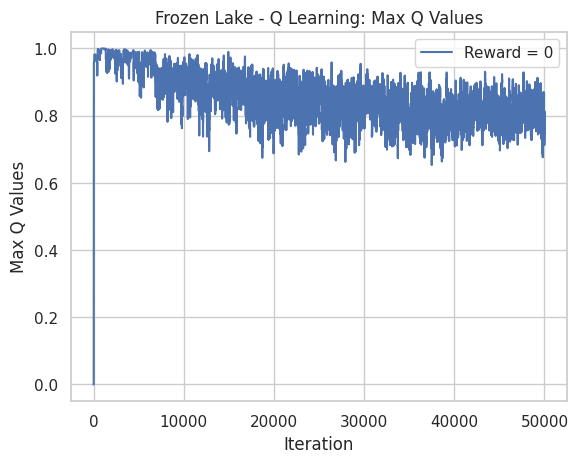

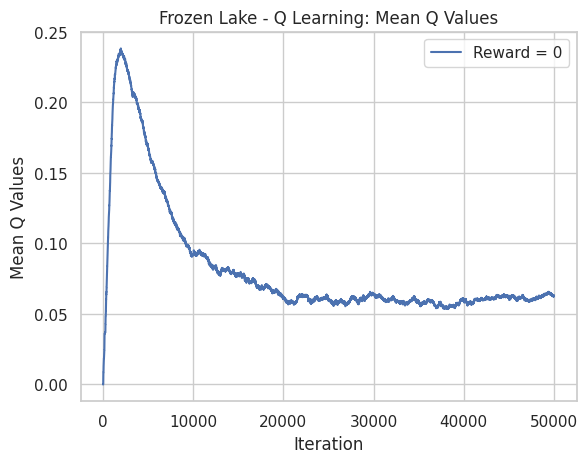

## Convergence

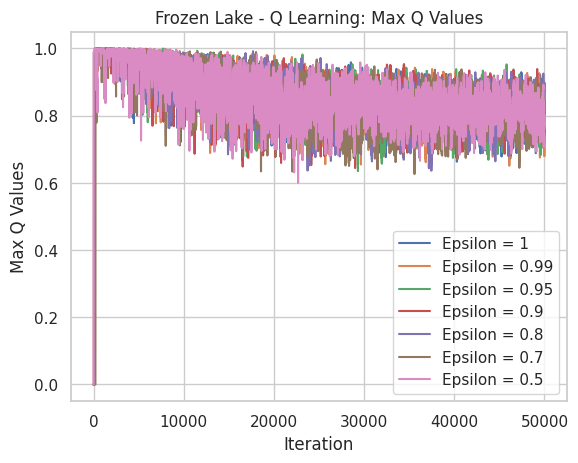

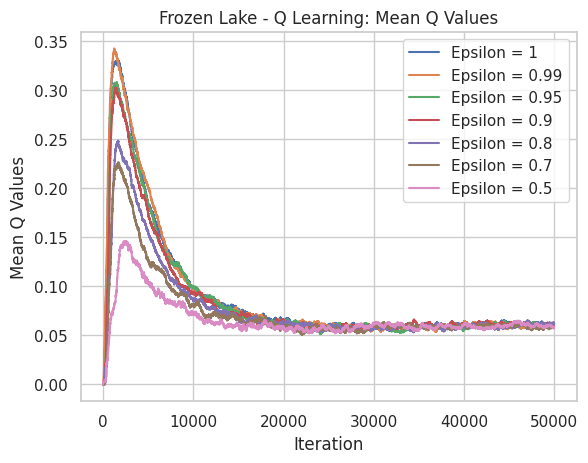

In [ ]:
plot_v_iters(q_epsilons_tracked_values, q_epsilons, "Epsilon", "Frozen Lake - Q Learning", y_label='Q Values')

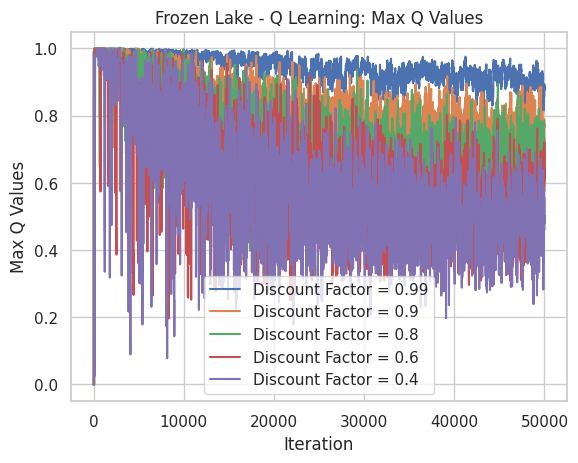

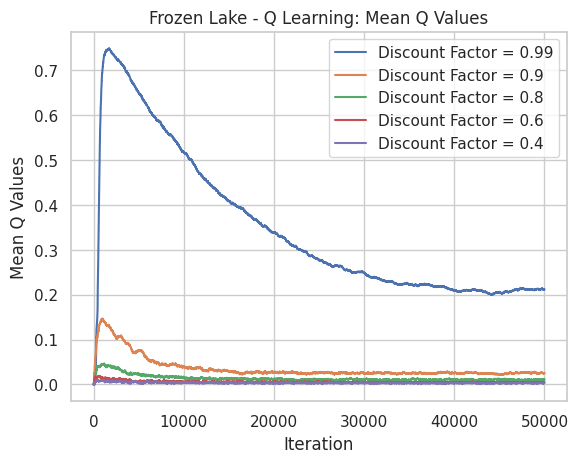

In [ ]:
plot_v_iters(q_gammas_tracked_values, q_gammas, "Discount Factor", "Frozen Lake - Q Learning", y_label='Q Values')

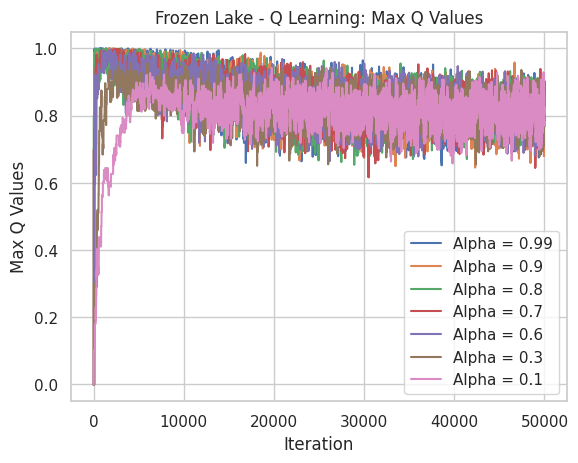

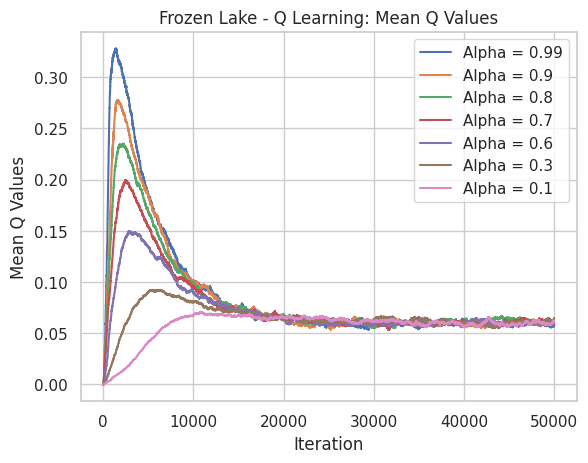

In [ ]:
plot_v_iters(q_alphas_tracked_values, q_alphas, "Alpha", "Frozen Lake - Q Learning", y_label='Q Values')

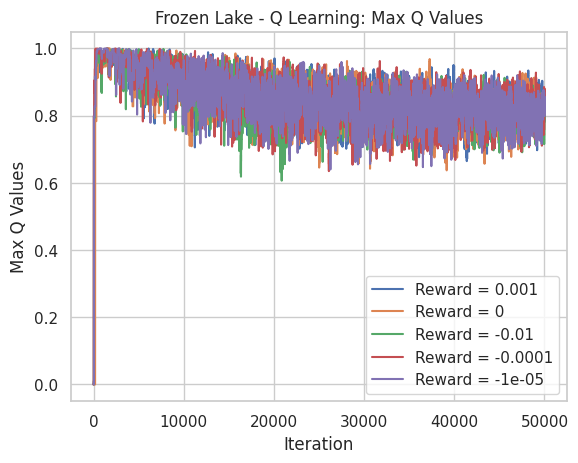

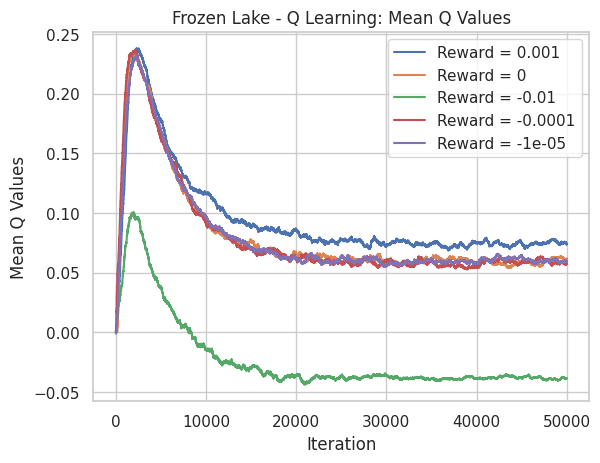

In [ ]:
plot_v_iters(q_rewards_tracked_values, q_rewards, "Reward", "Frozen Lake - Q Learning", y_label='Q Values')

## States

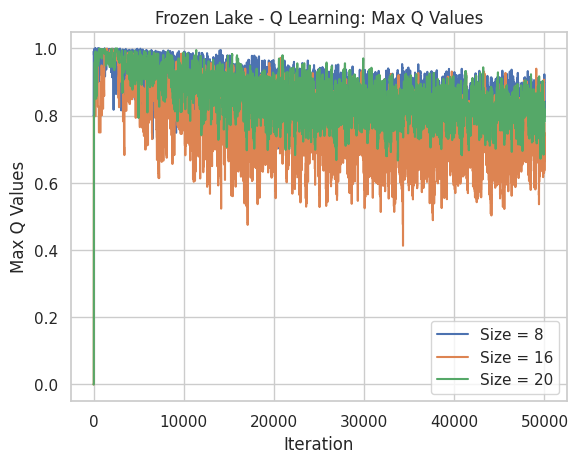

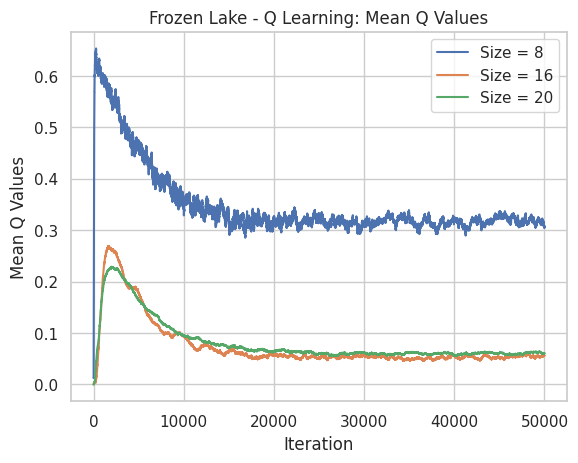

In [17]:
plot_v_iters(q_sizes_tracked_values, q_sizes, "Size", "Frozen Lake - Q Learning", y_label='Q Values')

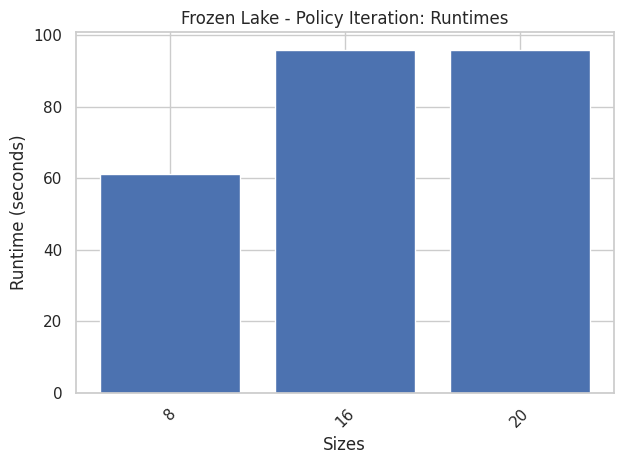

In [18]:
plot_training_times(q_sizes_runtimes, q_sizes, "Sizes", "Frozen Lake - Policy Iteration: Runtimes")